In [1]:
from faker import Faker
import random
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 유니코드 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

faker = Faker()
random.seed(42)
faker.seed_instance(42)


In [2]:
# 사용자 데이터 생성
users = []
for i in range(1, 501):
    user = {
        "user_id": i,
        "age": random.randint(18, 65),
        "gender": random.choice(["Male", "Female"]),
        "team_preference":random.choice(["기아 타이거즈", "삼성 라이온즈", "LG 트윈스", "KT 위즈", "두산 베어스",
                                         "SSG 랜더스", "NC 다이노스", "키움 히어로즈", "한화 이글스", "롯데 자이언츠"])
    }
    users.append(user)
    
users_df = pd.DataFrame(users)
print(users_df.head())


   user_id  age  gender team_preference
0        1   58    Male         기아 타이거즈
1        2   65  Female           KT 위즈
2        3   32    Male         삼성 라이온즈
3        4   61    Male         롯데 자이언츠
4        5   45    Male         기아 타이거즈


In [3]:
# 상품 데이터 생성
items = []
categories = ["유니폼", "사인볼", "모자", "키링", "응원도구", "기타"]

for i in range(1, 51):  # 50개의 상품
    category = random.choice(categories)
    
    # 카테고리별 가격 범위 설정
    if category == "유니폼":
        price = int(random.gauss(150000, 30000))  # 평균 150,000원, 표준 편차 30,000원
        price = max(60000, min(price, 250000))  # 현실적인 범위로 제한
    elif category == "사인볼":
        price = int(random.gauss(50000, 30000))  # 평균 50,000원, 표준 편차 30,000원
        price = max(50000, min(price, 150000))  # 범위 제한
    elif category == "모자":
        price = int(random.gauss(60000, 15000))  # 평균 60,000원, 표준 편차 15,000원
        price = max(30000, min(price, 120000))  # 범위 제한
    elif category == "키링":
        price = int(random.gauss(20000, 5000))  # 평균 20,000원, 표준 편차 5,000원
        price = max(10000, min(price, 30000))  # 범위 제한
    elif category == "응원도구":
        price = int(random.gauss(20000, 5000))  # 평균 30,000원, 표준 편차 10,000원
        price = max(7000, min(price, 60000))  # 범위 제한
    else:  # 기타
        price = int(random.gauss(10000, 8000))  # 평균 20,000원, 표준 편차 8,000원
        price = max(10000, min(price, 30000))  # 범위 제한
    
    # 할인 적용 (20% 확률)
    if random.random() < 0.2:
        price = int(price * 0.8)  # 20% 할인

    # 프리미엄 적용 (10% 확률)
    if random.random() < 0.1:
        price = int(price * 1.5)  # 50% 프리미엄

    # 가격을 100원 단위로 절삭
    price = (price // 100) * 100

    item = {
        "item_id": i,
        "name": f"Item {i}",
        "category": category,
        "price": price
    }
    items.append(item)

# 데이터프레임 생성
items_df = pd.DataFrame(items)
print(items_df.head())

   item_id    name category   price
0        1  Item 1       키링   24000
1        2  Item 2     응원도구   17200
2        3  Item 3      유니폼  162400
3        4  Item 4      유니폼  169800
4        5  Item 5       키링   15000


In [4]:
transactions = []

# 최근 생성된 사용자
total_users = 500  # 사용자 수
new_user_ids = list(range(int(total_users * 0.9), total_users + 1))

for i in range(1, 3001):  # 500개의 거래 생성
    user_id = random.randint(1, len(users))  # 사용자 ID
    item = random.choice(items)  # 상품 정보 선택 (items는 상품 데이터 리스트)
    category = item["category"]  # 상품의 카테고리
    original_price = item["price"]  # 원래 상품 가격

    # 가격 생성 (할인 및 프리미엄 반영)
    price = original_price
    if random.random() < 0.2:  # 20% 확률로 할인
        price = int(original_price * 0.8)
    if random.random() < 0.1:  # 10% 확률로 프리미엄 적용
        price = int(original_price * 1.5)

    # 가격을 100원 단위로 절삭
    price = (price // 100) * 100

    # 의심 기준 초기화
    is_suspicious = 0  # 초기값: 정상 거래

    # 1) 비정상적인 할인/할증 비율
    if price < original_price * 0.5 or price > original_price * 2:  # 50% 이하 또는 2배 이상
        is_suspicious = 1

    # 2) 비정상적인 시간대 거래
    transaction_time = faker.date_time_this_year()
    if transaction_time.hour in [3, 4, 5]:  # 새벽 3~5시 거래
        is_suspicious = 1

    # 3) 동일 상품 반복 거래 의심
    if random.random() < 0.01:  # 1% 확률로 동일 상품 반복 거래
        is_suspicious = 1

    # 4) 새로운 사용자
    if user_id in new_user_ids and random.random() < 0.5:  # 50% 확률로 의심
        is_suspicious = 1

    # 거래 생성
    transaction = {
        "transaction_id": i,
        "user_id": user_id,
        "item_id": item["item_id"],
        "category": category,
        "price": price,
        "original_price": original_price,
        "transaction_time": transaction_time,
        "is_suspicious": is_suspicious  # 사기 의심 여부
    }
    transactions.append(transaction)

# 데이터프레임 생성
transactions_df = pd.DataFrame(transactions)
print(transactions_df.head())


   transaction_id  user_id  item_id category  price  original_price  \
0               1      260       33      사인볼  56800           56800   
1               2      326       25      사인볼  40000           40000   
2               3      404        5       키링  15000           15000   
3               4      396       38       키링  10500           10500   
4               5      280       22      사인볼  74300           74300   

     transaction_time  is_suspicious  
0 2025-01-16 12:29:35              0  
1 2025-01-03 16:51:18              0  
2 2025-01-01 14:34:11              0  
3 2025-01-07 16:12:58              0  
4 2025-01-06 22:39:35              0  


### 데이터 탐색 (EDA)

In [5]:
# 의심 거래 비율 확인
suspicious_ratio = transactions_df["is_suspicious"].mean()
print(f"의심 거래 비율: {suspicious_ratio * 100:.2f}%")

# 카테고리별 거래 분석
category_analysis = transactions_df.groupby("category").agg({
    'price': ['mean', 'median'],
    'is_suspicious': 'mean'
})
print(category_analysis)


의심 거래 비율: 18.23%
                  price           is_suspicious
                   mean    median          mean
category                                       
기타         16544.200000   13000.0      0.182000
모자         72296.153846   60500.0      0.160839
사인볼        71721.003717   72000.0      0.171004
유니폼       142743.740573  138800.0      0.203620
응원도구       19081.884058   18300.0      0.199275
키링         17434.490239   16000.0      0.158351


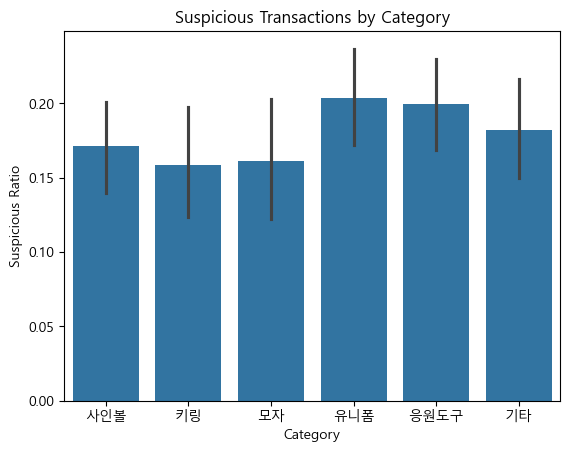

In [6]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=transactions_df['category'], y=transactions_df['is_suspicious'])
plt.title('Suspicious Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Suspicious Ratio')
plt.show()


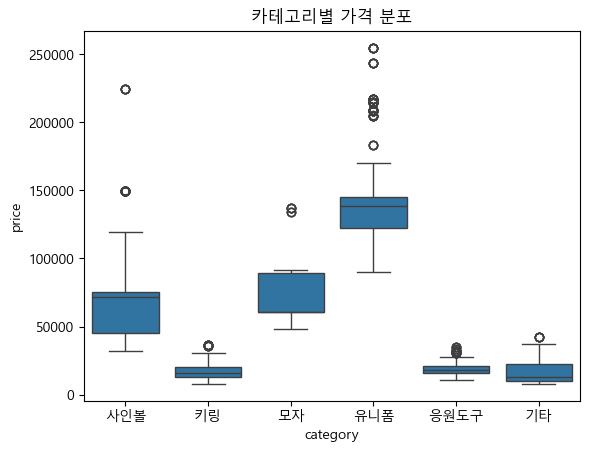

In [7]:
sns.boxplot(data=transactions_df, x="category", y="price")
plt.title("카테고리별 가격 분포")
plt.show()

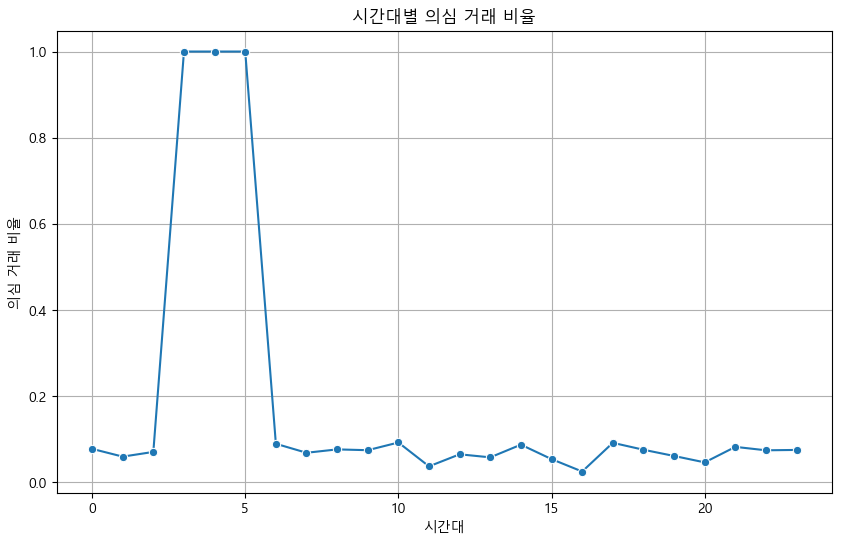

In [8]:
# 거래 시간대 추출
transactions_df['hour'] = transactions_df['transaction_time'].dt.hour

# 시간대별 의심 거래 비율 계산
hourly_analysis = transactions_df.groupby('hour')['is_suspicious'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_analysis, x='hour', y='is_suspicious', marker='o')
plt.title('시간대별 의심 거래 비율')
plt.xlabel('시간대')
plt.ylabel('의심 거래 비율')
plt.grid()
plt.show()

     user_id  is_suspicious
451      452       1.000000
446      447       1.000000
497      498       1.000000
464      465       1.000000
447      448       1.000000
6          7       1.000000
495      496       0.875000
476      477       0.857143
460      461       0.833333
455      456       0.833333


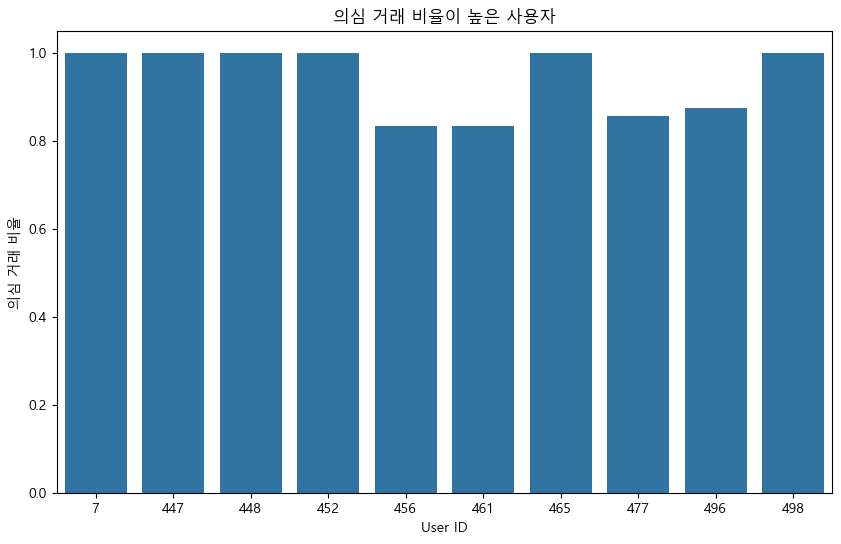

In [9]:
# 사용자별 의심 거래 비율
user_suspicious = transactions_df.groupby('user_id')['is_suspicious'].mean().reset_index()

# 상위 10명 사용자 출력
top_suspicious_users = user_suspicious.sort_values(by='is_suspicious', ascending=False).head(10)
print(top_suspicious_users)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top_suspicious_users, x='user_id', y='is_suspicious')
plt.title('의심 거래 비율이 높은 사용자')
plt.xlabel('User ID')
plt.ylabel('의심 거래 비율')
plt.show()


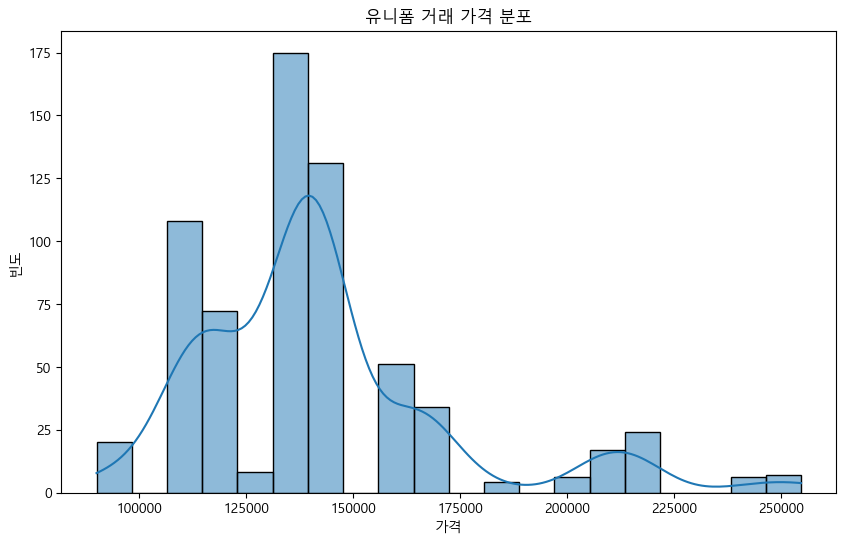

유니폼 의심 거래 비율: 20.36%


In [10]:
# 특정 카테고리 데이터 필터링
uniform_df = transactions_df[transactions_df['category'] == '유니폼']

# 가격 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(uniform_df['price'], kde=True, bins=20)
plt.title('유니폼 거래 가격 분포')
plt.xlabel('가격')
plt.ylabel('빈도')
plt.show()

# 의심 거래 비율 확인
uniform_suspicious_ratio = uniform_df['is_suspicious'].mean()
print(f"유니폼 의심 거래 비율: {uniform_suspicious_ratio * 100:.2f}%")
